(array([], dtype=float64), array([-0.99520876+1.25710574j, -1.37006783+0.41024972j,
       -1.37006783-0.41024972j, -0.99520876-1.25710574j]), 5.258199010244166)


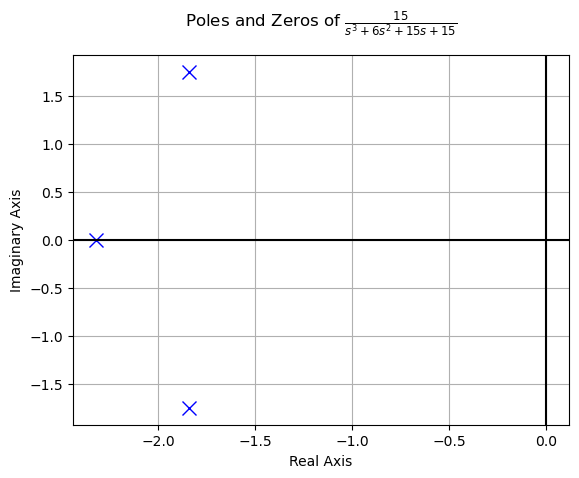

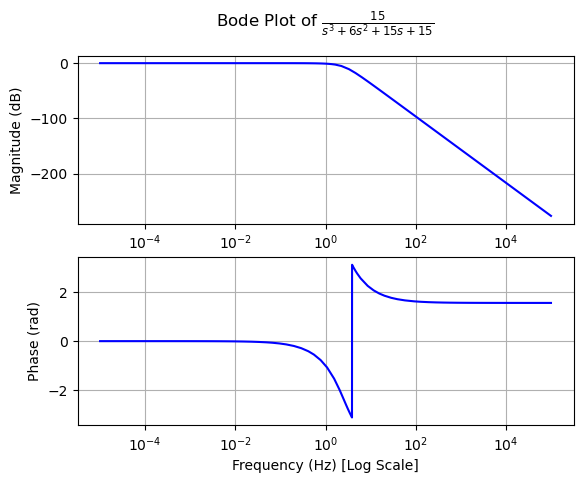

In [16]:
import sympy as sp
from sympy import ground_roots, real_roots, nroots
from sympy.abc import s
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot
import matplotlib.pyplot as plt
from scipy import signal as sig

s = sp.symbols('s', complex=True)

w = sp.symbols('w', complex=True)

T_s = 15/(s**3 + 6*s**2 +15*s +15)
T_s_ = 15/(-s**3 + 6*s**2 -15*s +15)

z = sig.besselap(4, norm='mag')
print(z)

T_s_num, T_s_den = sp.fraction(sp.factor(T_s))

tf_ts = TransferFunction(T_s_num, T_s_den, s)

fig = plt.figure()  # a new figure window
ax = pole_zero_plot(tf_ts, show  = False) 
display(fig)

bode_plot(tf_ts)


In [2]:
S_21 = T_s

S_11_2 = sp.cancel(T_s*T_s_ - 1)

display(S_11_2)

n,d = sp.fraction(S_11_2)

roots1 = real_roots(n)
roots2 = nroots(n)

roots3 = real_roots( d )
roots4 = nroots(d)

display(roots1)
display(roots2)
display(roots3)
display(roots4)


(-s**6 + 6*s**4 - 45*s**2)/(s**6 - 6*s**4 + 45*s**2 - 225)

[0, 0]

[0,
 0,
 -2.20320266118432 - 1.36165412871613*I,
 -2.20320266118432 + 1.36165412871613*I,
 2.20320266118432 - 1.36165412871613*I,
 2.20320266118432 + 1.36165412871613*I]

[CRootOf(x**3 + 6*x**2 + 15*x + 15, 0), CRootOf(x**3 - 6*x**2 + 15*x - 15, 0)]

[-2.32218535462609,
 2.32218535462609,
 -1.83890732268696 - 1.75438095978372*I,
 -1.83890732268696 + 1.75438095978372*I,
 1.83890732268696 - 1.75438095978372*I,
 1.83890732268696 + 1.75438095978372*I]

(2.0*s**3 + 10.4064053223687*s**2 + 21.7082039324994*s + 15.0)/(1.59359467763137*s**2 + 8.29179606750068*s + 15.0)

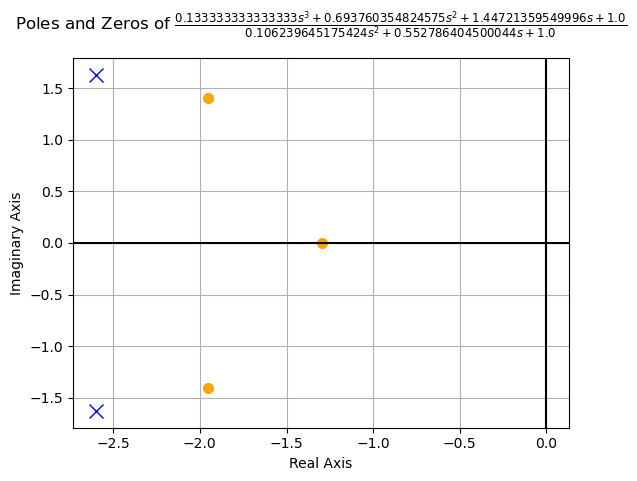

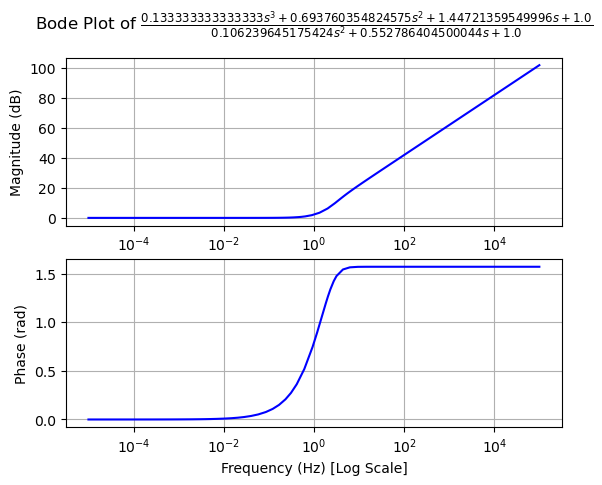

In [3]:


## Anoto los resultados de display, luego:
num = s*(s + complex(2.20320266118432,1.36165412871613) ) * (s + complex(2.20320266118432,-1.36165412871613) )
den = (s + 2.32218535462609)*(s + complex(1.83890732268696,- 1.75438095978372) )*(s + complex(1.83890732268696, 1.75438095978372) )
R_0 = 1

S_11 = num  / den

Z1 = R_0 * (1 + S_11)/(1 - S_11)

Z1 = sp.cancel(sp.simplify(Z1))

display(Z1)

Z1_num, Z1_den = sp.fraction(sp.factor(Z1))

tf1 = TransferFunction(Z1_num, Z1_den, s)

fig = plt.figure()  # a new figure window
ax = pole_zero_plot(tf1, show  = False) 
display(fig)

bode_plot(tf1)



In [15]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor

# Para sintetizar la red cumpliendo con la transferencia tengo que remover los polos en infinito

#Z1, k0 = tc2.cauer_LC(Z1)

#print(k0)

#d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

#d = tc2.dibujar_puerto_entrada(d,
#                        voltage_lbl = ('+', '$V$', '-'), 
#                        current_lbl = '$I$')


#tc2.dibujar_cauer_LC(ki =k0 , z_exc = Z1)


# La topología circuital guía las remociones:

display(Z1)

Y2, YA = tc2.remover_polo_infinito(1/Z1)

Z3, ZB = tc2.remover_polo_infinito(1/Y2)

Y4, YC = tc2.remover_polo_infinito(1/Z3)

Z5, ZD = tc2.remover_polo_infinito(1/Y4)

Y5 = sp.cancel(sp.simplify(Y5))

display(Y5)

d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          Z1, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)


d = tc2.dibujar_elemento_derivacion(d, Capacitor, YA)

d = tc2.dibujar_elemento_serie(d, Resistor, ZA)

d = tc2.dibujar_elemento_derivacion(d, Resistor, YB)

d = tc2.dibujar_elemento_serie(d, Resistor, ZA)

d = tc2.dibujar_elemento_derivacion(d, Resistor, YB)

d = tc2.dibujar_elemento_serie(d, Resistor, ZA)

d = tc2.dibujar_elemento_derivacion(d, Resistor, YB)


display(d)


(2.0*s**3 + 10.4064053223687*s**2 + 21.7082039324994*s + 15.0)/(1.59359467763137*s**2 + 8.29179606750068*s + 15.0)

(0.106239645175424*s**2 + 0.552786404500044*s + 1.0)/(3.08853629413197e-31*s**3 + 3.54569478171605e-15*s**2 + 0.192189323598717*s + 1.0)

NameError: name 'Capacitor' is not defined

In [12]:
from sympy import pdiv
from sympy import Poly


Poly(Z1_den, s).pdiv(Poly(Z1_num,s))

Z2, ZA = tc2.remover_polo_infinito(Z1)

Y3, YB = tc2.remover_polo_infinito(1/Z2)

Z4, ZC = tc2.remover_polo_infinito(1/Y3)

Y5, YD = tc2.remover_polo_infinito(1/Z4)

Y5 = sp.cancel(sp.simplify(Y5))



(Poly(0.106239645175424*s**2 + 0.552786404500044*s + 1.0, s, domain='RR[s]'),
 Poly(0, s, domain='RR[s]'))